# Feature selection

Our objective is to get insight which features selection techniques would guarantee optimal model performance

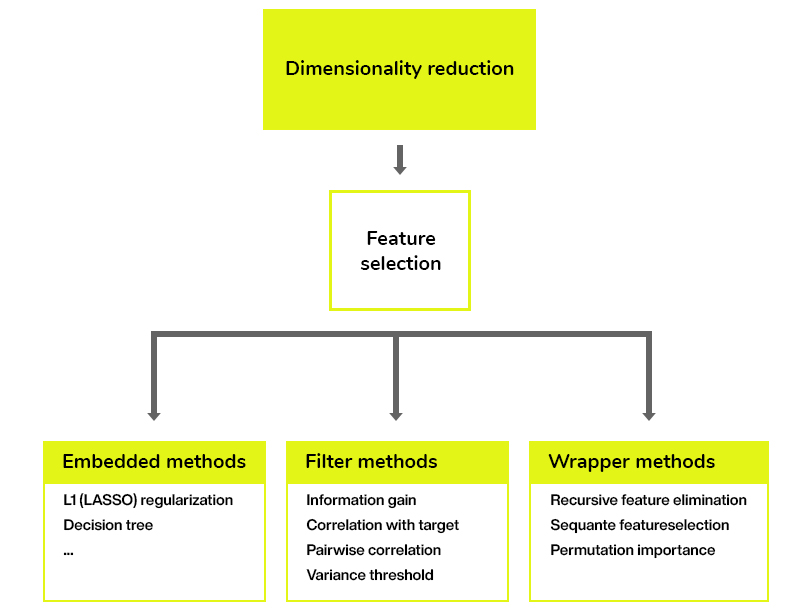

The classes in the <code>**sklearn.feature_selection**</code> can be used for feature selection and dimensionality reduction on sample sets, either to improve estimator's accuracy scores or to boost their performance on very high dimensioanal datasets.

## Numerical Feature Selection (Filter methods)

There are two popular feature selection techniques that can be used for numerical input data and a numerical target variable:<br>
  <code>**- Correlation Statistics**</code><br>
  <code>**- Mutual Information Statistics**</code><br>
  <code>**- Variance threshold**</code>

### Removing features with low variance

Variance threshold is a simple baseline approach to feature selection. It removes all features whose variance doens't meet some threshold. By default it removes all zero variances features, i.e features that have the same value in all samples.

Sklearn provides a ton of functionality that's not just prediction. Some of the functionality is preprocessing the data. Again these are like models they can only rely on the training data but don't really predict anything. Thus they do have a `fit` method but don't have a predict method.

<div class="alert alert-block alert-info">
<h2>Variance</h2>
    
The <code>**average of the squared differences from the mean**</code> The variance is often used to quantify spread or dispersion. Spread is a characteristic of a sample or population that describes how much variability there is in it. A high variance tells us that the values in our dataset are far from their mean. So, our data will have high levels of variability
    
\begin{multline*}
    \sigma^{2} = \dfrac{1}{n}\sum^{n-1}_{i=0}(x_{i} - \mu)^{2}
\end{multline*}
</div>

In [24]:
results = [
    -14.82381293, 
    -0.29423447, 
    -13.56067979, 
    -1.6288903, 
    -0.31632439,
     0.53459687,
    -1.34069996, 
    -1.61042692, 
    -4.03220519, 
    -0.24332097
]

In [26]:
m = sum(results) / len(results)
var = sum((xi - m) ** 2 for xi in results) / len(results) 
print(var)

28.822364260579157


In [25]:
import numpy as np
print(np.var(results))

28.822364260579157


In [27]:
import matplotlib.pyplot as plt

In [33]:
value_avg = [np.mean(results)] * len(results)

In [60]:
x = range(len(results))

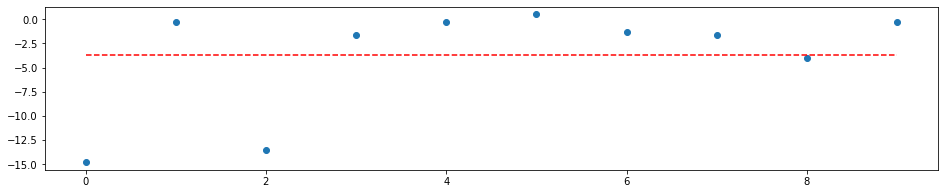

In [59]:
plt.figure(figsize=(16,3))
plt.plot(x, value_avg, color='red',  ls='--')
plt.scatter(x, results);

In [1]:
from sklearn.feature_selection import VarianceThreshold

X = [
    [0, 0, 1],
    [0, 1, 0],
    [1, 0, 0],
    [0, 1, 1],
    [0, 1, 0],
    [0, 1, 1]
]

In [61]:
np.var(X)

0.9966613384103709

In [22]:
VarianceThreshold?

In [64]:
thr_value = (.8 * (1 - .8))
thr_value

0.15999999999999998

In [65]:
select = VarianceThreshold(threshold=thr_value)

In [5]:
X_sf = select.fit_transform(X)

In [6]:
X_sf

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

### Univariate feature selection

<code>**Univariate feature selection**</code> works by selecting the best features based on univariate statistical tests.It can be seen as a preprocessing step to an estimator.  And that test can be <code>**Correlation**</code>which is a measure of <code>**how two variables change together or are related**</code>.Perhaps the most common correlation measure is <code>**[Pearson’s correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)**</code> that assumes a Gaussian distribution to each variable and reports on their linear relationship. <code>**Correlation is a tool to quantify the strength of this relationship**</code>

Linear correlation scores are typically a value between -1 and 1 with 0 representing no relationship.For a <code>**single feature selection**</code>, we are often interested in a positive score with the larger the positive value, the larger the relationship, and, more likely, the feature should be selected for modeling. As such the linear correlation can be converted into a correlation statistic with only positive values.

The sklearn library provides an implementation of the correlation statistic in the <i><code>**f_regression()**</code></i> function. This function makes univariate linear regression tests and returs F-statistic and p-values, to know more about these terms visit this <code>**[link](https://www.youtube.com/watch?v=Uh2ky5RXkeA)**</code> and this <code>**[link](https://www.scribbr.com/statistics/p-value/)**</code>.

And this function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the  <i><code>**SelectKBest**</code></i>  class. In other words the `f_regression` variable inside the `SelectKBest` constructor tells the selector that it must score the variables according to an F-score calculated starting from `Pearson’s correlation coefficient` between each feature and the target variable.

<div class="alert alert-block alert-info">
<h2>Terminology</h2>
    
For <code>**correlation**</code> a <code>**p-value**</code> tells us the probability that randomly drawn points will result in a similarly strong relationship or stronger. <code>**Thus the smaller the p-value the more confidence we have in the prediction**</code> we make with the line.
</div>

`sklearn` exposes few feature selection routines as object that implement the transform method.
 - <code>**SelectKBest**</code> removes all but the k highest scoring features

 - <code>**SelectPercentile**</code> removes all but a user-specified highest scoring percentage of features

 - <code>**GenericUnivariateSelect**</code> allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator.

Using common univariate statistical tests for each feature:
 - <code>**SelectFpr**</code> false positive rate
 - <code>**SelectFwe**</code> family wise error
 - <code>**SelectFdr**</code> false discovery rate

In their turn these objects take as input a scoring function that returns univariate scores and p-values (or only scores for SelectKBest and SelectPercentile):

<code>**For regression:**</code> f_regression, mutual_info_regression<br>
<code>**For classification:**</code> chi2, f_classif, mutual_info_classif

The methods based on F-test estimate the degree of linear dependency between two random variables. On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.

<div class="alert alert-danger" role="alert">
<h2>Warning</h2>
Beware not to use a regression scoring function with a classification problem, you will get useless results.
</div>

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [151]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, r_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

In [10]:
f_regression?

In [142]:
X, y = make_regression(
    n_samples=1000, 
    n_features=100, 
    n_informative=10, 
    noise=0.1, 
    random_state=1
)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [144]:
fs = SelectKBest(score_func=f_regression, k='all')

In [145]:
# run score function on (X, y) and get the appropriate features.
fs.fit(X_train, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x10ACA4F8>)

In [146]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.060209
Feature 1: 0.615870
Feature 2: 1.168582
Feature 3: 0.029825
Feature 4: 0.340986
Feature 5: 5.533906
Feature 6: 0.060202
Feature 7: 2.203756
Feature 8: 0.194679
Feature 9: 111.570360
Feature 10: 0.394140
Feature 11: 1.472768
Feature 12: 2.434251
Feature 13: 0.066042
Feature 14: 0.037625
Feature 15: 4.226163
Feature 16: 1.096182
Feature 17: 0.108449
Feature 18: 6.416253
Feature 19: 0.683952
Feature 20: 0.036637
Feature 21: 0.078519
Feature 22: 0.268654
Feature 23: 0.618507
Feature 24: 1.164046
Feature 25: 0.743163
Feature 26: 0.248131
Feature 27: 0.419666
Feature 28: 57.596222
Feature 29: 0.183628
Feature 30: 0.229114
Feature 31: 0.448740
Feature 32: 0.045846
Feature 33: 0.761433
Feature 34: 45.874840
Feature 35: 2.337928
Feature 36: 0.904018
Feature 37: 1.003512
Feature 38: 2.693478
Feature 39: 63.088776
Feature 40: 239.454245
Feature 41: 0.927942
Feature 42: 0.293314
Feature 43: 1.184302
Feature 44: 1.346787
Feature 45: 0.166156
Feature 46: 14.196243
Feature 47: 2.7

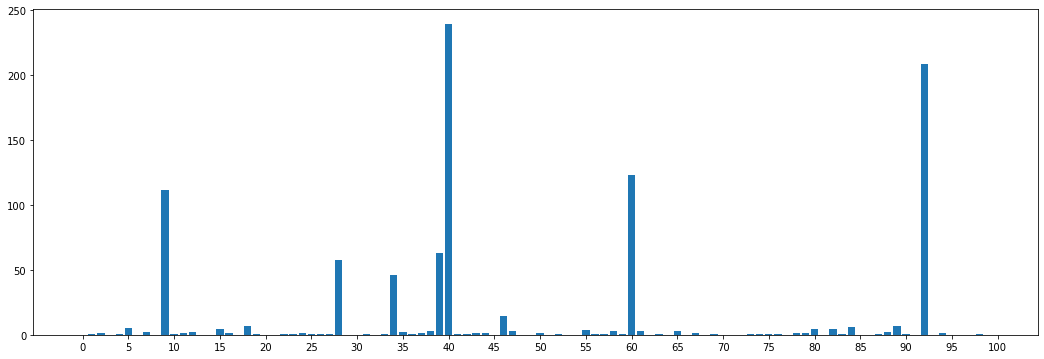

In [147]:
plt.figure(figsize=(18,6))
plt.xticks(ticks=np.linspace(0, 110, num=22, endpoint=False))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

The plot clearly shows that 8 features are a lot more important than the other features. We could set k=8 When configuring the SelectKBest to select these top features.

In [148]:
 X_new = SelectKBest(score_func=f_regression).fit_transform(X, y)

In [149]:
X_new.shape

(1000, 10)

## Mutual Information Feature Selection

Mutual information from the field of [information theory](https://www.youtube.com/watch?v=d9alWZRzBWk) is the application of information gain (typically used in the construction of decision trees) to feature selection. Mutual information is calculated between <code>**two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.**</code>

<code>**The concept of Mutual information**</code>

It is an information theoretic concept that concerns the outcome of two random variables and how can we think of mutual information as <code>**measuring the reduction in uncertainty for predicting parts of the outcome of a system after we observe the outcome of the other part of the system**</code> so if we know the value of one of the random variables in a system there is a corresponding reduction in uncertainty for predicting the other one and mutual information measures that reduction in uncertainty and implicit to this reasoning is the fact that we know that the entropy is an ideal measure of uncertainty in a system and we also know that entropy is a measure of information content of some random process or knowing the outcome of that random process how much information to be gained by knowing that.

\begin{multline*}
I(X_{1}, X_{2}) = \sum_{X_{1}} \ \sum_{X_{2}} \ P(X_{1}, X_{2}) \ \log \dfrac{P(X_{1}, X_{2})}{P(X_{1})P(X_{2})}
\end{multline*}

This formula for mutual information which is used fro two discrete processes if we have to continous processes by contrast then both of these sums here become integrals. And that a fairly complicated mathematical formulation

#TODO : make sample case with 2 coin flips

Essentially the mutual information is a way of capturing the degree of dependance between two variables. If they are strongly dependant then the idea is that there is a high degree of mutual information and that means that we know a lot more by knowing the joint distribution than we do by knowing just the marginal distributions.

Slightly more mathematical way of thining about mutual informations as being the [Kullback Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) in going from the joint distribution to the product of the marginal distributions and we can get that by appealing to the actual formula for Kullback–Leibler divergence but essenatially all it's telling us is what's the <code>**informational cost in representing our system as the product of marginal opposed to the full joint distribution.**</code>
    
\begin{multline*}
\end{multline*}

The scikit-learn machine learning library provides an implementation of mutual information for feature selection with numeric input and output variables via the `mutual_info_regression` function. Like with `f_regression` it can be used in the <code>**SelectKBest**</code> feature selection strategy. 

In [152]:
fs = SelectKBest(score_func=mutual_info_regression, k='all')

In [153]:
fs.fit(X_train, y_train)

SelectKBest(k='all', score_func=<function mutual_info_regression at 0x11D72468>)

We can perform feature selection using mutual information on the dataset and print and plot the scores. The larger is better

In [156]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.041485
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.020206
Feature 5: 0.000000
Feature 6: 0.030384
Feature 7: 0.000000
Feature 8: 0.000000
Feature 9: 0.084524
Feature 10: 0.004159
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.000000
Feature 14: 0.002461
Feature 15: 0.000000
Feature 16: 0.000000
Feature 17: 0.000000
Feature 18: 0.034083
Feature 19: 0.000000
Feature 20: 0.000000
Feature 21: 0.014042
Feature 22: 0.018560
Feature 23: 0.023172
Feature 24: 0.079169
Feature 25: 0.000000
Feature 26: 0.021386
Feature 27: 0.000000
Feature 28: 0.015914
Feature 29: 0.001555
Feature 30: 0.014790
Feature 31: 0.013465
Feature 32: 0.057155
Feature 33: 0.009666
Feature 34: 0.025976
Feature 35: 0.000000
Feature 36: 0.073050
Feature 37: 0.037153
Feature 38: 0.000000
Feature 39: 0.060067
Feature 40: 0.128902
Feature 41: 0.005969
Feature 42: 0.005838
Feature 43: 0.000000
Feature 44: 0.013306
Feature 45: 0.000000
Feature 46: 0.044577
Feature 47: 0.000000
Fe

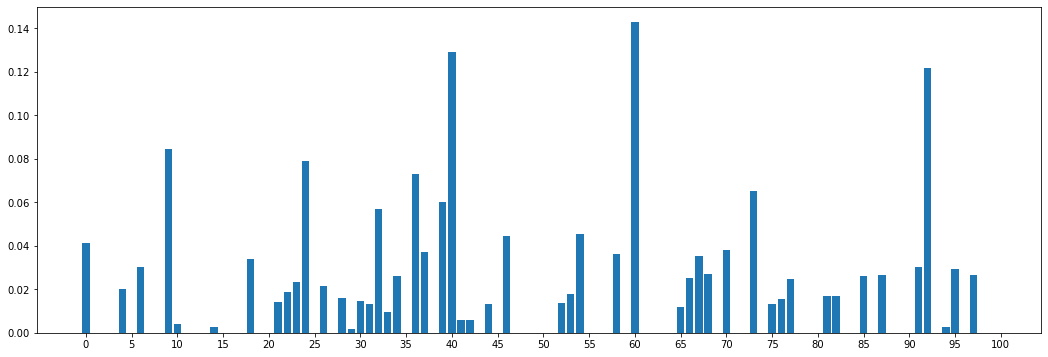

In [157]:
plt.figure(figsize=(18,6))
plt.xticks(ticks=np.linspace(0, 110, num=22, endpoint=False))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Compared to the correlation feature selection method we can clearly see many more features scored as being relevant. This may expalin that is because of the statistical noise that we added to the dataset in its construction

## Recursive feature elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination <code>**(RFE)**</code> is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and weights are assigned to each one of them. Then, features whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

<code>**It is very important to normalize these features in linear models**</code>

<code>**Consider a generalized linear model like linear or logistic regression**</code>
 1. Fit model to dataset (normalized dataset)
 2. <code>**Eliminate feature with the smallest coefficient (most unimportant!)**</code>
 3. Repeat steps 1 - 2 until desired number of features is reached

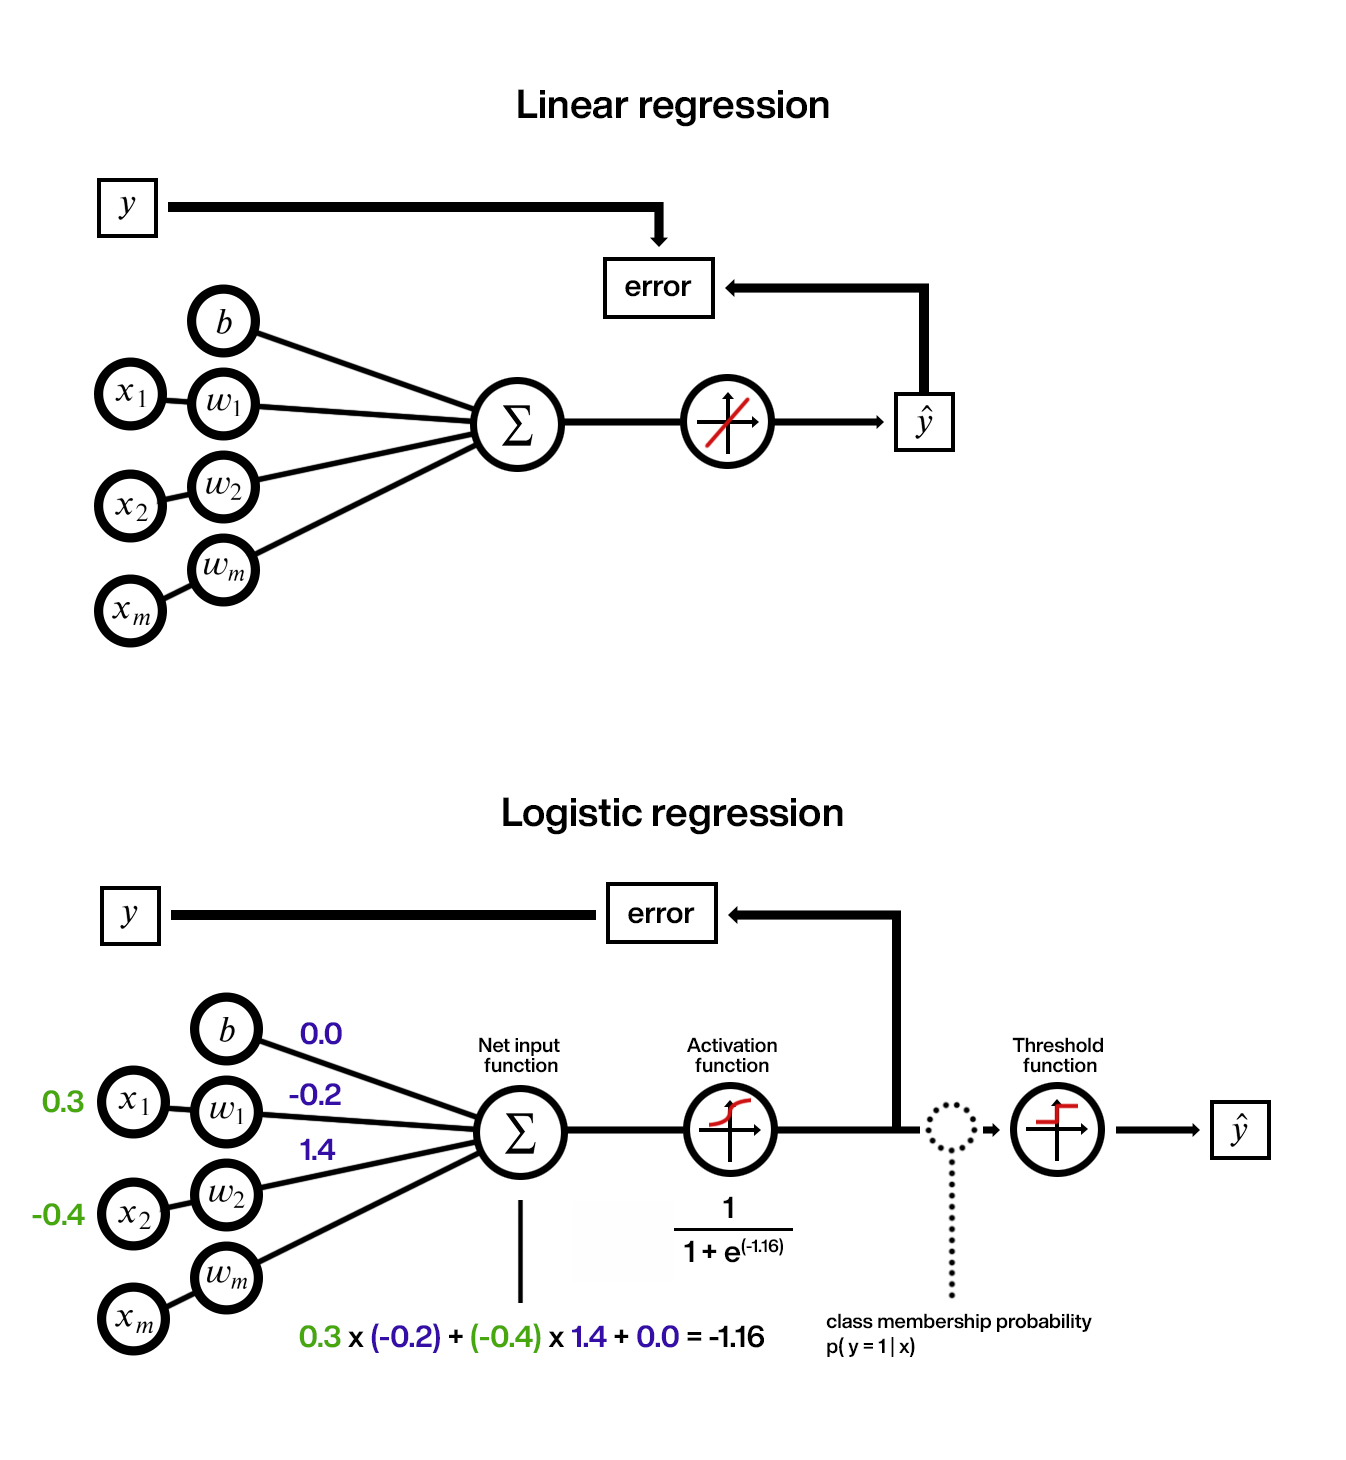

In [69]:
import numpy as np
import pandas as pd

In [299]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [402]:
df = pd.read_csv('../data_samples/wine_data.csv')

In [433]:
df.columns

Index(['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [404]:
np.unique(df["Class label"])

array([1, 2, 3], dtype=int64)

In [434]:
df

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [405]:
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

In [461]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [462]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test__std = sc.transform(X_test)

In [408]:
# solvers: newton-cg, lbfgs, liblinear, sag, saga
lr = LogisticRegression(solver='liblinear', random_state=123)

In [409]:
rfe = RFE(estimator=lr, n_features_to_select=5, step=1)

The hyperparameter `n_features_to_select` is set to 3 but this number is arbitrary and we could later on use <code>**GridSearchCV**</code> to determine what is a good number of features to select.

`step` parameter means how many features do we select at a time. Remember the 3 steps in <code>**RFE**</code> are:
 1. Fit model
 2. Eliminate one feature with smallest weight
 
And we could also instead of eliminating the one feature with smallerst weight we could set to do it with two features with the smallerst weights. And this `step` determines how many features do we select at each given time. If we have a number greater than 1 this algorithm will run a bit faster but typically if we use a linear model like `LogisticRegression` is rather relatively fast algorithm because linear models are fast to optimize if the dataset are very large. So i recommend in practice use `step=1` because why not.

In [410]:
rfe.fit(X_train_std, y_train)

RFE(estimator=LogisticRegression(random_state=123, solver='liblinear'),
    n_features_to_select=5)

In [411]:
X_train_sub = rfe.transform(X_train_std)

In [412]:
X_train_sub.shape

(124, 5)

To determine which features where selected we can <code>**RFE**</code> attribute `support_` that returns a `boolean` mask

In [413]:
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
        True,  True, False,  True])

In [415]:
df.columns[1:][rfe.support_]

Index(['Alcohol', 'Flavanoids', 'Color intensity', 'Hue', 'Proline'], dtype='object')

<code>**RFE**</code> as a part of <code>**Pipeline**</code>

In [416]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [426]:
pipe = make_pipeline(
    StandardScaler(),
    RFE(estimator=lr, step=1), 
    KNeighborsClassifier()
)

In [418]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test__std = sc.transform(X_test)

In [450]:
parameters = {
    'rfe__n_features_to_select': range(1, 13),
    'kneighborsclassifier__n_neighbors': range(1, 10)
}
parameters

{'rfe__n_features_to_select': range(1, 13),
 'kneighborsclassifier__n_neighbors': range(1, 10)}

In [451]:
grid = GridSearchCV(pipe, param_grid=parameters, cv=10, n_jobs=-1)

In [452]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('rfe',
                                        RFE(estimator=LogisticRegression(random_state=123,
                                                                         solver='liblinear'))),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 10),
                         'rfe__n_features_to_select': range(1, 13)})

In [453]:
print(f'Best params  : {grid.best_params_}')
print(f'Best accuracy: {grid.best_score_}')

Best params  : {'kneighborsclassifier__n_neighbors': 1, 'rfe__n_features_to_select': 8}
Best accuracy: 0.9923076923076923


In [464]:
grid.best_estimator_.score(X_test, y_test)

0.9629629629629629

In [463]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_std, y_train)
knn.score(X_test__std, y_test)

0.9259259259259259

To conclude about <code>**RFE**</code>

 - Can explicitly select number of features
 - Not super expensive if linear model is used
 - Takes feature interaction into account


 - Assumes linear separability if linear model is used
 - Does not optimize performance metric directly
 - Needs search method to find good number of features

<code>**RFE can be used with other models**</code>

It can be used with other than model like Linear or Logistic regression. 
We can use any estimator that has attribute `coef_` or `feature_importances_`. We are not limited to anything that is generlized linear model.

## Permutation importance

<code>**2 step outline for simplicity of this method**</code><br>

For each feature column:
 1. Shuffle feature column
 2. Observe performance and compare to original
 
In a nutshell for each feature column in a data set we shuffle that column. And then we take an existing trained model and observe the performance of that model on the shuffled data set or the data set with a shuffled feature and compare it to the original performance of the model. And ussually there is a <code>**drop**</code> in performance if we shuffle the feature column. And this drop of performance gives us an <code>**indicator of how important that feature is that we shuffled**</code>. It turns out a little bit complicated if we summarize it in 2 steps. So let's walk through this more slowly.

TODO:include barchart of feature importance.

When apply this method to each column in the data set we can make such a nice bar plot and show the importance of each feature and also optionally with standart deviation.

__

Note worthy facts about permutation importance is that it often gives similar result as random forest impurity-based importance but it is model agnostic. This means that it is not resticted lets say to random forest but we can use with any type of ML algorithm.<br>

Also permutation importance is not strictly feature selection but it tells us which features a model relies on the most.
In that sense feature importance is not feature selection but we can is use to select features. 
<br>


We can think of permutation as a <code>**Generalization of Method B in the random forest**</code> lecture but hold out set instead of OOB (out of bag) samples. But don't worry if we didn't cover this lecture yet.

__

### Intuitive & model agnostic 

1. Take a model that was fit to the training set <b>`>>> randomforest.fit(X_train, y_train)`</b>
2. Estimate the predictive performance of the model on an independant dataset (e.g validation or test dataset) and record it as the baseline performance <b>`>>> acc = randomforest.score(X_val, y_val) >> 0.99`</b>
3. For each feature <b><i>j</i></b>:
 - a.  randomly permute feature column j in the orginal dataset
 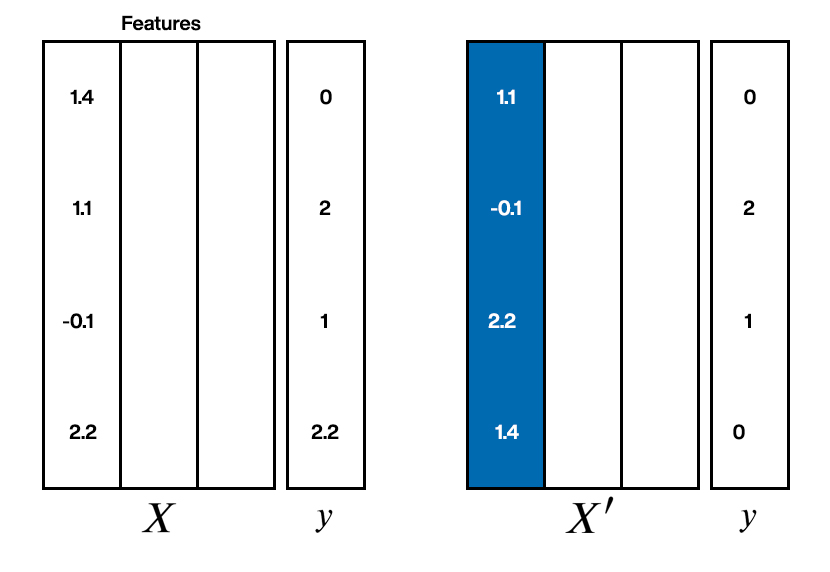

 - b. record the predictive performance of the model on the dataset with the permuted (shuffled) column  <b>`>>> acc = randomforest.score(X_val_perm, y_val_perm) >> 0.85`</b>
 - c. compute the feature importance as the difference between the baseline performance (step 2) and the performance on the permuted dataset <b>`>>> 0.99 - 0.85 = 0.14`</b>
 
 <code>**Repeat a-c exhaustively (all combinations) or a large number of times and compute the feature importance as the average difference**</code>

In [467]:
import numpy as np
import pandas as pd

In [475]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [468]:
df = pd.read_csv('../data_samples/wine_data.csv')

In [469]:
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [470]:
np.unique(df['Class label'])

array([1, 2, 3], dtype=int64)

Notice that we are not creating a any validation set. But for permutation performance it would be redundat since we are looking into drop of perfomance.

In [547]:
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [548]:
frs = RandomForestClassifier(n_estimators=100, random_state=0)

In [549]:
frs.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [479]:
print(f'training accuracy: {np.mean(frs.predict(X_train) == y_train) * 100}')
print(f'testing  accuracy: {np.mean(frs.predict(X_test) == y_test) * 100}')

training accuracy: 100.0
testing  accuracy: 100.0


This accuracy indicates either that its a good model or indicates that the data set is pretty easy to classify. When we compute the permuation importance it is kind of important to have a very well perfroming model. If we want interpret the feature importance as a general feature importance. If we don't have a model that performs well we might find out what features the model relies on the most but it doesn't really tell us how important the featur is in the context of the target variable if the model is not very accurate.

<code>**impurity-based importance**</code>

In [500]:
importance_values = frs.feature_importances_
indices = np.argsort(importance_values)[::-1]

In [501]:
importance_values

array([0.10555438, 0.02752069, 0.01151643, 0.01129616, 0.03584676,
       0.05578069, 0.16796338, 0.01228992, 0.02496121, 0.16764694,
       0.06234868, 0.13362561, 0.18364915])

In [502]:
np.argsort(importance_values)[::-1]

array([12,  6,  9, 11,  0, 10,  5,  4,  1,  8,  7,  2,  3], dtype=int32)

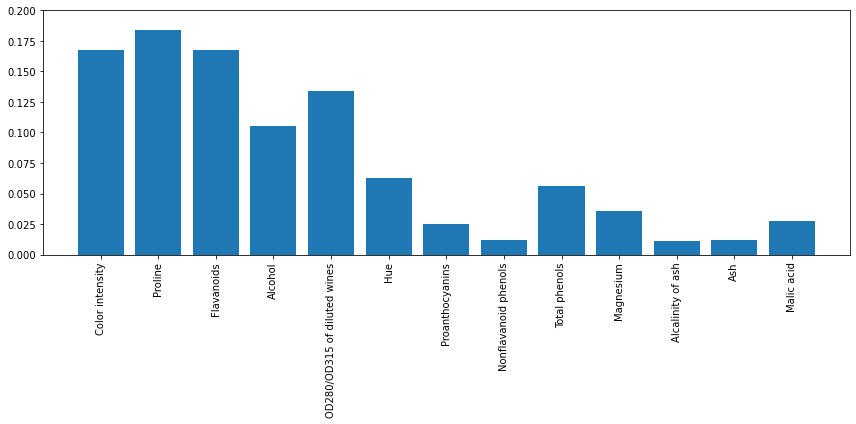

In [518]:
plt.figure(figsize=(12,6))
plt.bar(range(X_train.shape[1]), importance_values[indices])
plt.xticks(range(X_train.shape[1]), df.columns[1:][indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylim([0, 0.2])
plt.tight_layout()


### Computing importance permutation

In [519]:
from sklearn.inspection import permutation_importance

We use test set but we also could use validation test set if we would have one. But its fine to use test set because we are not really resusing the test set on different models we assume here that we have a final model and we just want to find out how our final model uses the different features in the data set.

In [525]:
result = permutation_importance(
    estimator=frs,
    X=X_test,
    y=y_test,
    scoring='accuracy',
    n_repeats=50,
    random_state=0
)

In [527]:
result.importances_mean

array([0.02777778, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04851852, 0.        , 0.        , 0.10518519,
       0.00555556, 0.01814815, 0.09407407])

In [529]:
result.importances_std

array([0.01493011, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01955962, 0.        , 0.        , 0.0352222 ,
       0.00848625, 0.01199566, 0.03204078])

In [531]:
std = result.importances_std
indices = np.argsort(result.importances_mean)[::-1]

In [532]:
std

array([0.01493011, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01955962, 0.        , 0.        , 0.0352222 ,
       0.00848625, 0.01199566, 0.03204078])

In [533]:
indices

array([ 9, 12,  6,  0, 11, 10,  8,  7,  5,  4,  3,  2,  1], dtype=int32)

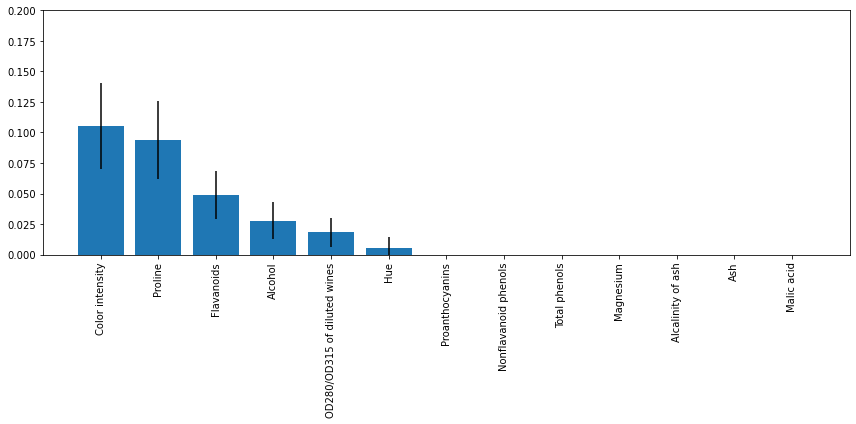

In [535]:
plt.figure(figsize=(12,6))
plt.bar(range(X_train.shape[1]), result.importances_mean[indices], yerr=std[indices])
plt.xticks(range(X_train.shape[1]), df.columns[1:][indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylim([0, 0.2])
plt.tight_layout()

Letsd compare both plots of two methods for feature importance side by side. By practice its noticeable that it gives very consistent results. This mean that the ranking order of the features is often similar or identical. But there is not the case. But however we look at the top 6 they happen to be relatively consisten with impurity-base feature and permutation only the order slighly differs. There is some consistency.

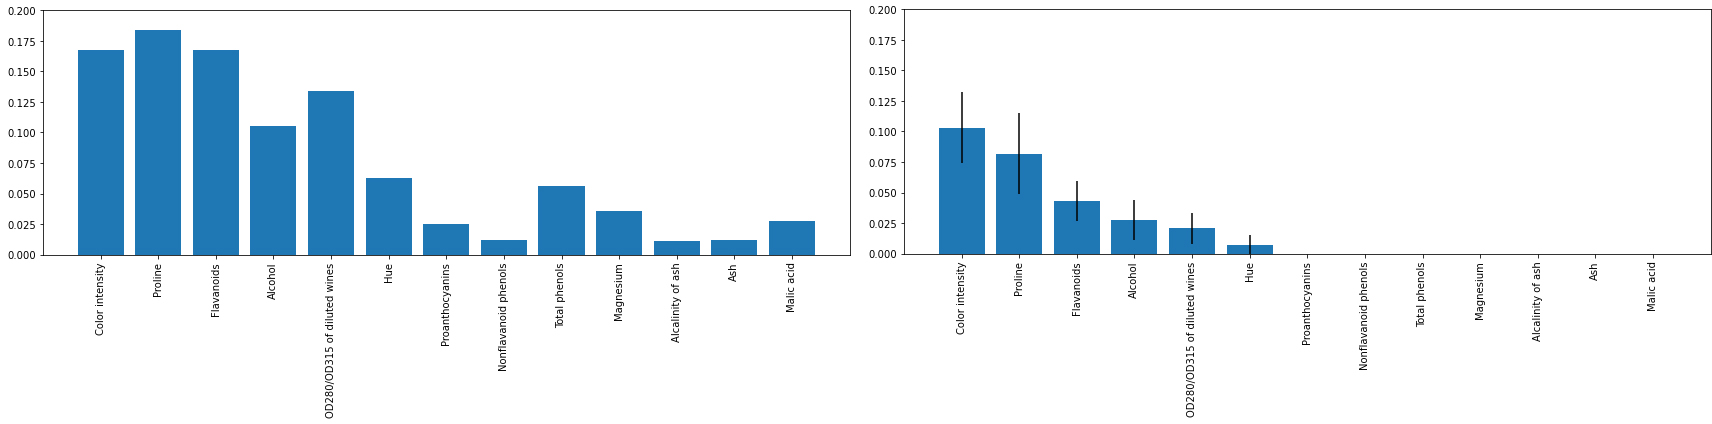

More useful not to scale the feature importance as we can red the accuracy drop from it.Usually the impurity-based is scaled that the all columns sum up to 1. And this is not the case on permutation importance because it represents the average drop in metric.Lets say that if we permute `color intesity` our model performance drops by `10%`.

### Random features as control

Relatively usefull in practice is to including a random feature as a control when we compute permutation importance. It can give as an idea of what is a meaningful feature importance and what is not.

In [554]:
np.random.seed(123)
x1 = np.random.randn(X_train.shape[0]).reshape(-1, 1)
x2 = np.random.randn(X_test.shape[0]).reshape(-1, 1)

In [558]:
X_train_r = np.hstack((X_train, x1))
X_test_r  = np.hstack((X_test, x2))
X_test_r.shape

(54, 14)

In [561]:
frs = RandomForestClassifier(n_estimators=100, random_state=0)

In [563]:
frs.fit(X_train_r, y_train)

RandomForestClassifier(random_state=0)

In [564]:
result = permutation_importance(
    estimator=frs,
    X=X_test_r,
    y=y_test,
    scoring='accuracy',
    n_repeats=50,
    random_state=0
)

In [566]:
indices = np.argsort(result['importances_mean'])[::-1]

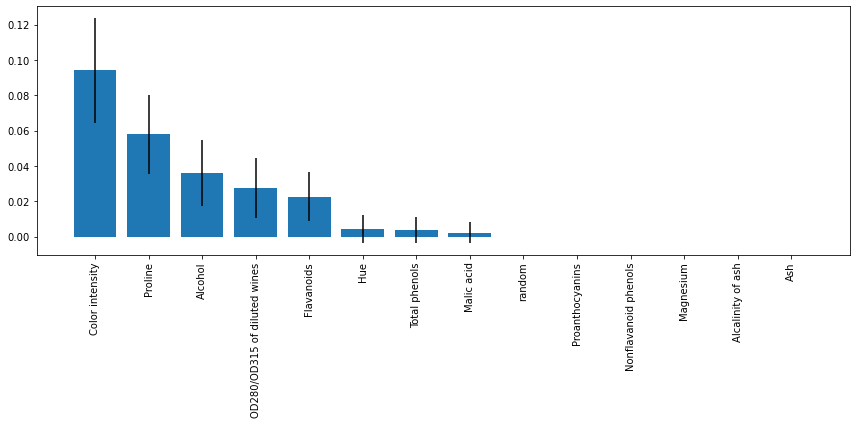

In [579]:
plt.figure(figsize=(12,6))
plt.bar(
    range(X_train_r.shape[1]), 
    result['importances_mean'][indices],
    yerr=result['importances_std'][indices]
)
feature_names = np.array(list(df.columns[1:])+['random'])
plt.xticks(range(X_train_r.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()

We can use now the importance of random feature as a `threshold of validity` for the other features.

### Correlated features

One problem with permutation importance similar to impurity-based performances is if we have a `collinear` meaning higly correlated features. They will share the importance.

In [580]:
np.random.seed(123)
y=np.zeros(1000)
y[:500] = 1

In [582]:
x1 = np.random.randn(1000)
x2 = np.empty(1000)
x2[:500] = np.random.randn(500)
x2[500:] = np.random.randn(500) + 4

x3 = x2

In [583]:
X = np.vstack((x2, x2, x1)).swapaxes(1, 0)

In [584]:
X.shape

(1000, 3)

Our artificial dataset where we have perfectly correlated features in `x2` and `x3`.  

In [605]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [606]:
frs = RandomForestClassifier(n_estimators=10, random_state=123, max_features=2)

In [607]:
frs.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=10, random_state=123)

In [608]:
print(f'training accuracy: {np.mean(frs.predict(X_train) == y_train) *100 }')
print(f'testing  accuracy: {np.mean(frs.predict(X_test) == y_test) *100 }')

training accuracy: 99.71428571428571
testing  accuracy: 97.66666666666667


In [609]:
from mlxtend.plotting import heatmap

In [610]:
corr = np.corrcoef(X_train.T)

In [611]:
corr.shape

(3, 3)

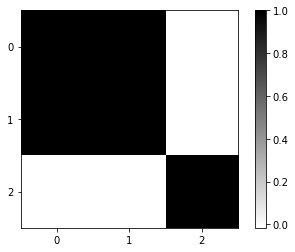

In [612]:
heatmap(corr, cmap='binary');

In [613]:
results = permutation_importance(
    estimator=frs,
    X=X_test,
    y=y_test,
    scoring='accuracy',
    n_repeats=50,
    random_state=123
)

In [614]:
indices = np.argsort(results['importances_mean'])[::-1]

In [617]:
std = results.importances_std

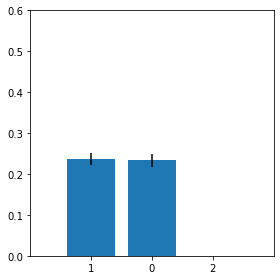

In [621]:
plt.figure(figsize=(4,4))
plt.bar(range(X_train.shape[1]),  results.importances_mean[indices], yerr=std[indices])
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.ylim([0, 0.6])
plt.tight_layout()

### Column-Dop variant

For each feature column <b><i>j</i></b>:
 1. Temporarily remove column 
 2. Fit model to reduced dataset
 3. Compute validtion set performance and compare to before
 
 More accurate but more expensive (and not for 1 particular model)
 (Will adopt something similar for SFS)
 
 
 ### Permutation importance pros and cons
 
  - Model agnostic so it means we can use with any classifier we like.
  - Based on metric of choice. It works on any time of metric that we can compute
  - Easy to understand. After all it just shuffles the collumns and measures its importance.
  - Feature importance is for that particular model(feature might be more/less important to another model).
    It can be viewed as a con as well in case if the model is not very accurate.
  - Unlikely impurity based radom forest feature importance it does not suffer from overfitting since an independant dataset is used
  - Like in impurity-based random forest importance the importance is undervalued if two featues are highly correlated


## Sequantial feature selection

In [622]:
#TODO:using SelectFromModel

To answer which feature selection technique quarantee optimal model performance is actually trying <code>**all possible feature combinations**</code> which happens to be <code>**exhaustive feature selection approach**</code>
<br>
<code>**features list:**</code> 
1. f_1 - {0}
2. f_2 - {1}
3. f_3 - {2}
4. f_4 - {3}

<code>**exhaustive feature selection approach:**</code>
1.  {0}
2.  {1}
3.  {2}
4.  {3}
5.  {0, 1}
6.  {0, 2}
7.  {0, 3}
8.  {1, 2}
9.  {1, 3}
10. {2, 3}
11. {0, 1, 2}
12. {0, 1, 3}
13. {0, 2, 3}
14. {1, 2, 3}
15. {0, 1, 2, 3}


So really its trying all these combinationsand seeing what works best for our classifier/regressor. Of course this could bev very prone to overfitting, which is why it's important touse a validation set here or even better <code>**K fold cross validation**</code> when we try out these different features subsets.

<br>

This approach has a limitation which motivates why we are interested in <code>**SFS**</code> and in order to introduce 
this limitation let look at the way how can we compute the number of all possible combinations of feature subsets.
We do this by using <code>**binomial coefficient**</code>, a.k.a "n choose k" : 

 - `n` is the number of items in my set (we use `m`)
 - `k` is the size of subset we want to choose (we use `i`)

\begin{multline*}
\sum^{m}_{i=1} \begin{pmatrix} m \\ i\end{pmatrix}	\ \text{combinations!} = \dfrac{m!}{i!(m-i)!}
\end{multline*}

\begin{multline*}
\begin{pmatrix} 4 \\ 1 \end{pmatrix} + \begin{pmatrix} 4 \\ 2 \end{pmatrix}	+ \begin{pmatrix} 4 \\ 3 \end{pmatrix} + \begin{pmatrix} 4 \\ 4 \end{pmatrix} = 15	
\end{multline*}

And if we have lets say 13 features then we will compute 8191 different combinations. That why it's <code>**exhaustive**</code> because it is very expensive.
Lets rather look at an approximation called <code>**Sequantial Feature Selections**</code> that is rather greedy search or heuristic in its nature.


### Sequantial backward selection

Illiustation of <code>**backward sequential feature selection**</code> for identifying feature subsets that maximize the performance of a predictvie model.Lets break it down and walk through it step by step.

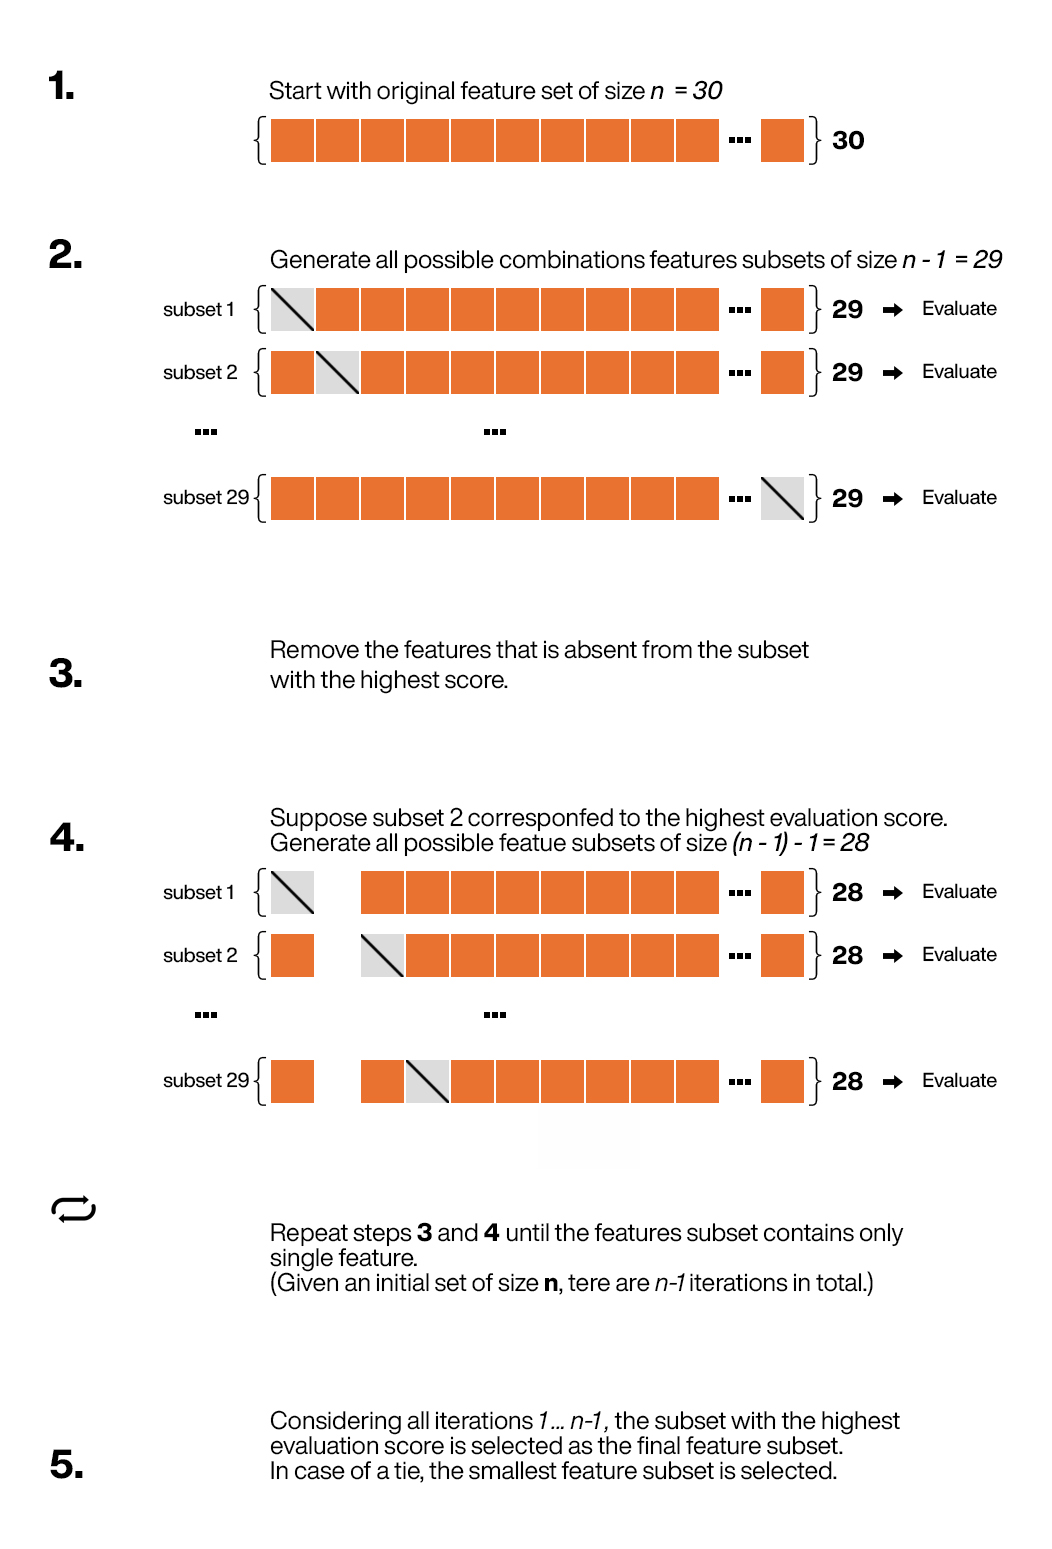

This one case above is a special type of sequantial selection, it's called backwards and is the most common type of SFS.
Starting with `step 1` would be start at the orginal feature set which consists of 30 features. `step 2` starts the iteration and we generate all possible feature subsets of size <code>**n-1**</code>. And the way we do that is essiantially taking the full feature set and just delete one feature at a time and then once we have these different subsets we evaluate each candidate feature subset. Validation can be le'ts say using K-fold cross validations and record the performance.

`step3` we locate specific subset with <code>**highest evaluation score**</code>and remove specific feature permanently that is absent in that particular subset. And now we will focus on that subset. `step4` starts iteration 2 that is essentially similar to going from `step 1` to `step 2` and again just remove one feature and make evaluations just that we <code>**start from the best subset from previous iteration round**</code>. Thats why it is called sequantial backward selection it is a iterative process were we remove one thing at a time and each iteration is really just the same we are just using the previous subset for the next round and keep on going with smaller subsets on each iteration.  <code>**Untill we end up with our desired feature set size or untill it contains only one single feature**</code>

### Different types of SFS
 - Sequantial Backward Selection
 - Sequantial Forward Selection
 - Sequantial Floating Forward Selection
 - Sequantial Floating Backward Selection

### Sequantial Forward Selection

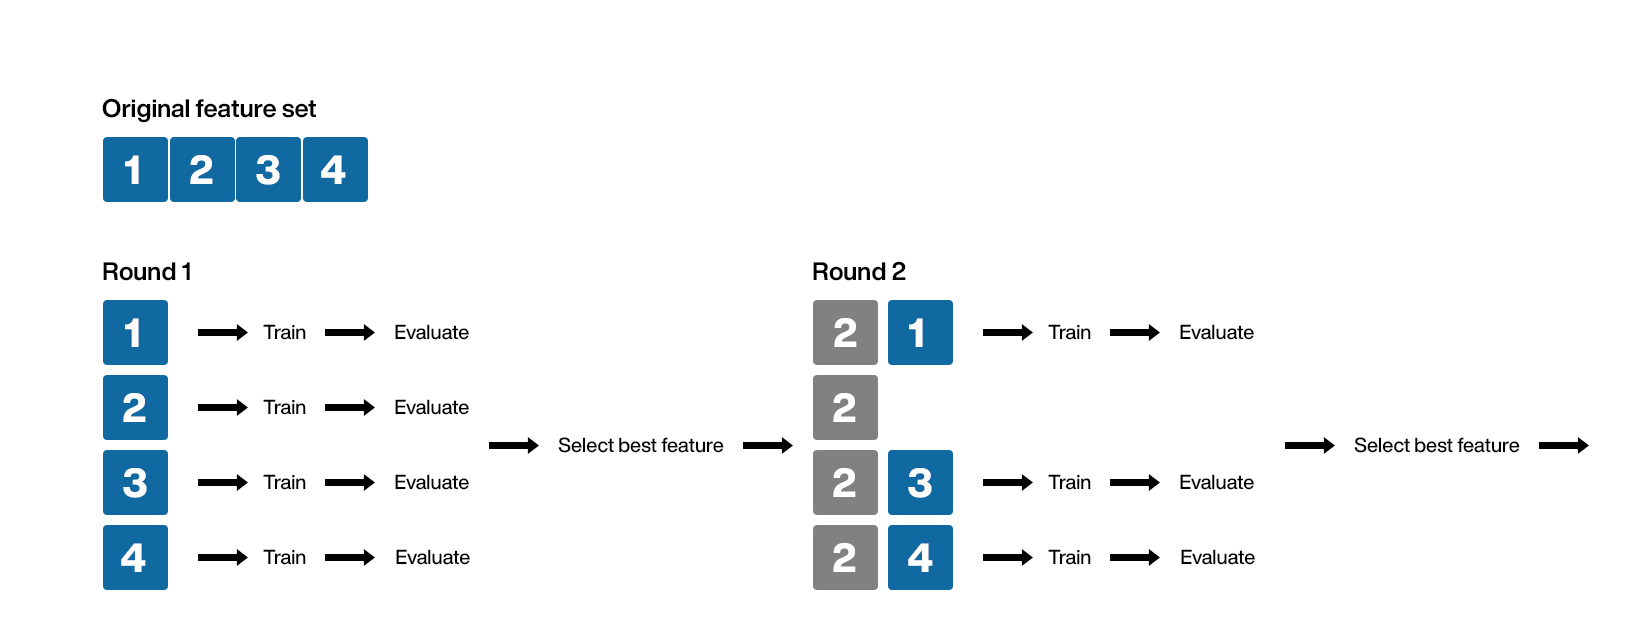

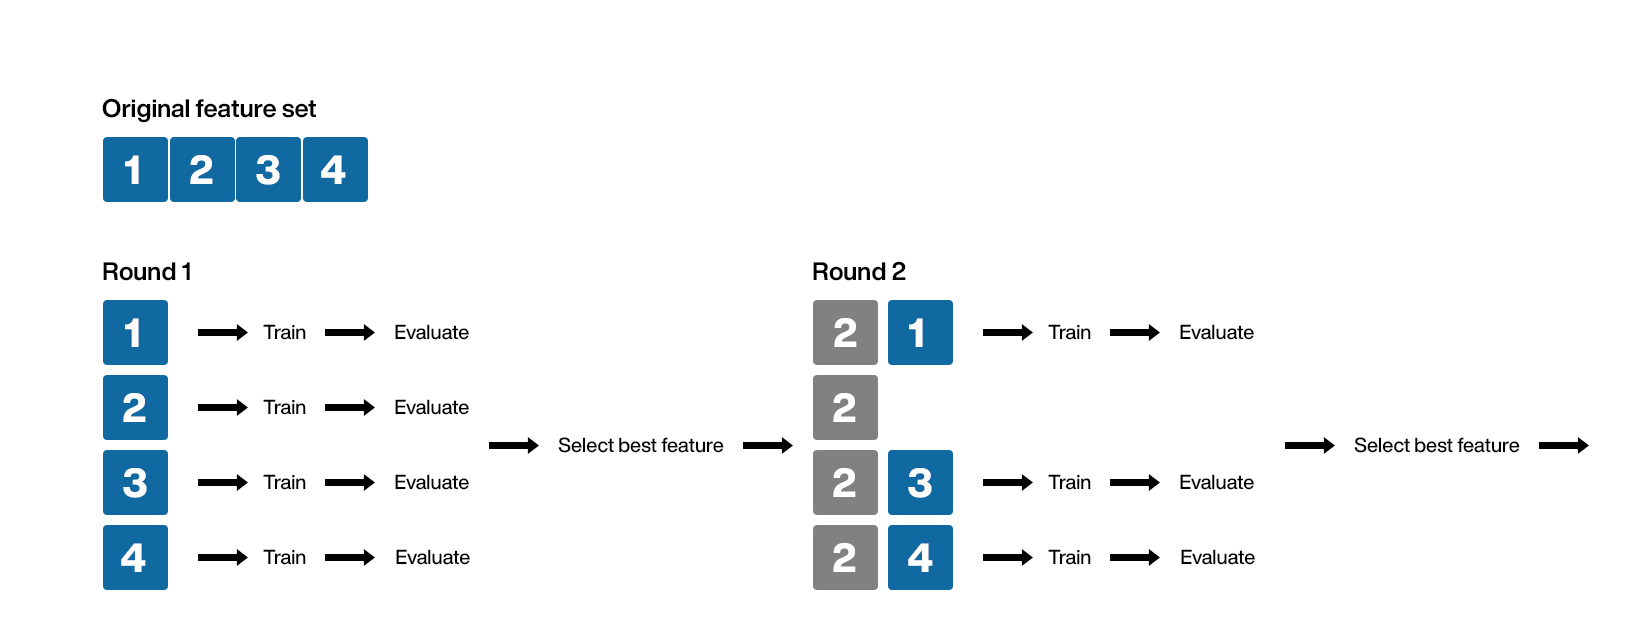

In [290]:
#Sklearn implementation
#SelectFromModel is a meta-transformer that can be used along with any estimator that has a <code>**coef_ or feature 
#importances attribute after fitting**</code>. The features are considered unimportant and removed, if the corresponding 
#coef_ or feature importances <code>**values are below the provided threshold parameter**</code>.
#Apart from specifying the 
#threshold numerically, there are <code>**built-in heuristics for finding a threshold using a string argument**</code>.
#Available heuristics are `"mean"`, `"median"` and float multiples of these like `"0.1 * mean"`.

In [258]:
df = pd.read_csv('../data_samples/wine_red.csv')

In [276]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [257]:
# df = pd.read_csv('https://archive.ics.uci.edu/'
#                       'ml/machine-learning-databases/wine/wine.data',
#                       header=None)


# df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
#                    'Alcalinity of ash', 'Magnesium', 'Total phenols',
#                    'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
#                    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
#                    'Proline']

# print('Labels', np.unique(df['Class label']))
# df

In [178]:
df.columns.size

12

In [277]:
X, y = df.drop('quality', 1), df['quality']

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [279]:
sc = StandardScaler()

In [280]:
X_train_std = sc.fit_transform(X_train)
X_test__std = sc.transform(X_test)

In [281]:
#lr = LogisticRegression(solver='liblinear', random_state=123)
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=6)

In [282]:
print(f'training accuracy: {np.mean(model.predict(X_train_std) == y_train)*100}')
print(f'testing  accuracy: {np.mean(model.predict(X_test__std) == y_test) *100}')

training accuracy: 68.02189210320563
testing  accuracy: 60.62499999999999


In [283]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(model, k_features=5, forward=True, floating=False, verbose=2, scoring='accuracy', cv=5)

In [284]:
sfs1 = sfs1.fit(X_train_std, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.4s finished

[2022-03-28 17:08:26] Features: 1/5 -- score: 0.5003860294117647[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished

[2022-03-28 17:08:27] Features: 2/5 -- score: 0.5809405637254902[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s finished

[2022-03-28 17:08:27] Features: 3/5 -- score: 0.5871752450980392[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [285]:
sfs1.k_feature_idx_

(1, 4, 6, 9, 10)

In [286]:
df.columns[:][list(sfs1.k_feature_idx_)]

Index(['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates',
       'alcohol'],
      dtype='object')

In [287]:
X_train_sfs = sfs1.transform(X_train_std)
X_test__sfs = sfs1.transform(X_test__std)

In [288]:
model.fit(X_train_sfs, y_train)

KNeighborsClassifier(n_neighbors=6)

In [289]:
print(f'training accuracy: {np.mean(model.predict(X_train_sfs) == y_train)*100}')
print(f'testing  accuracy: {np.mean(model.predict(X_test__sfs) == y_test)*100}')

training accuracy: 71.54026583268178
testing  accuracy: 56.56250000000001
